<a href="https://colab.research.google.com/github/chumpblocckami/colabs/blob/main/CryptoTwitterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GET TWEETS, COMPUTE SENTIMENT AND VISUALIZE RESULTS
- Phase one
1. Get tweets by @elon_musk
2. Get sentiment 
3. Visualize sentiment
- Phase two
1. Get replies and comments from @elon_musk tweets
2. Get sentiment
3. Visualize sentiment
4. Detect Stance
- Phase three
1. Get trading history data (bitcoin,dogecoin,...)
2. Create model that take in consideration data from tweets
3. Create trading bot (LR)
- Phase four 
1. Profit

##Phase 1
Get tweets

In [ ]:
#TWINT
!pip install nest_asyncio
!pip install --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

#NLP
!pip install transformers

In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()

tweets = []

# Configure
c = twint.Config()
c.Username = "elonmusk"
c.Limit = 100
c.User_full = True
c.Store_object = True
c.Store_object_tweets_list = tweets

# Run
twint.run.Search(c)


Inspect which attributes we get from twint

In [ ]:
attributes = [print(x) for x in dir(tweets[0]) if "_" not in x]

cashtags
datestamp
datetime
geo
hashtags
id
lang
link
mentions
name
near
photos
place
retweet
source
thumbnail
timestamp
timezone
translate
tweet
type
urls
username
video


In [ ]:
tweets[0].retweet

False

Get sentiment

In [ ]:
from transformers import pipeline
from tqdm import tqdm 

model = pipeline('sentiment-analysis')
results = model([t.tweet for t in tqdm(tweets)])

In [ ]:
import pandas as pd
import datetime as dt

data = pd.DataFrame([(t.datetime,t.tweet) for t in tweets],columns=["time","text"])

data["time"] = data["time"].apply(lambda x : dt.datetime.strptime(x.replace(" UTC",""),'%Y-%m-%d %H:%M:%S'))
data["time"] = data["time"].astype("datetime64")
data["time"] = data.time.dt.round('D')

data["sentiment"] = [pred["label"] if pred["score"]>0.7 else "NEUTRAL" for pred in results]

In [ ]:
to_plot = data["time"].groupby([data["time"],data["sentiment"]]).size().unstack(fill_value=0).reset_index()
to_plot.head()

sentiment,time,NEGATIVE,NEUTRAL,POSITIVE
0,2021-07-27,3,3,2
1,2021-07-28,3,0,3
2,2021-07-29,5,1,6
3,2021-07-30,11,1,10
4,2021-07-31,14,1,7


Visualize sentiment

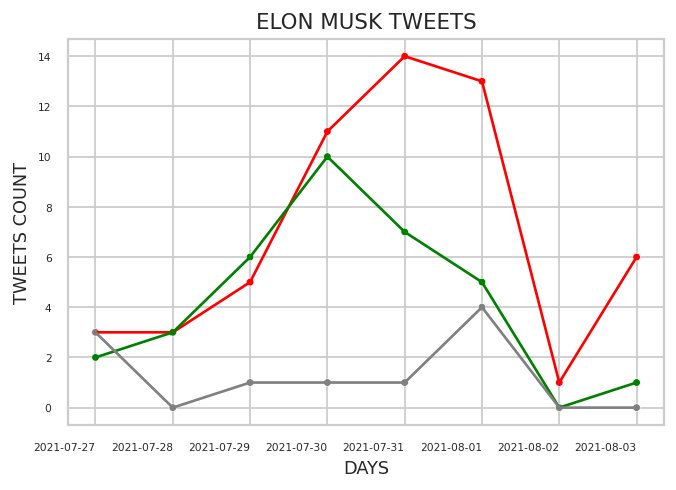

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

fig,ax = plt.subplots(dpi=128)

sns.scatterplot(x="time", y="NEGATIVE",color="red",data=to_plot, size=3, legend=False, ax=ax)
sns.lineplot(x="time", y="NEGATIVE", color="red", data=to_plot, ax=ax)


sns.scatterplot(x="time", y="POSITIVE",color="green",data=to_plot, size=3, legend=False, ax=ax)
sns.lineplot(x="time", y="POSITIVE", color="green", data=to_plot, ax=ax)

sns.scatterplot(x="time", y="NEUTRAL",color="gray",data=to_plot, size=3, legend=False, ax=ax)
sns.lineplot(x="time", y="NEUTRAL", color="gray", data=to_plot, ax=ax)

ax.set_title("ELON MUSK TWEETS",size=12)
ax.set_ylabel("TWEETS COUNT",size=10);
ax.set_xlabel("DAYS",size=10);

plt.yticks(rotation=0, ha='right',size=6);
plt.xticks(rotation=0, ha='right',size=6);

In [ ]:
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
from tqdm import tqdm 
import pandas as pd
import datetime as dt
import twint

#THIS ONLY IF WE'RE ON GOOGLE COLAB
import nest_asyncio
nest_asyncio.apply()

class Tweeeter():
  def __init__(user):
    
    self.user = user
    self.tweets = []
    self.dataset = []
    self.predictions = []
    
    self.model = pipeline('sentiment-analysis')

    self.configurations = None
    self.load_env()

  def load_env(self):
    self.configurations = twint.Config()
    self.configurations.Username = self.user
    self.configurations.Limit = 100
    self.configurations.User_full = True
    self.configurations.Store_object = True
    self.configurations.Store_object_tweets_list = self.tweets

  def fit():
    #GET TWEETS
    twint.run.Search(self.configurations)

    #COMPUTE PREDICTIONS
    self.predictions = model([t.tweet for t in tqdm(self.tweets)])

    #CREATE THE DATASET
    self.dataset = pd.DataFrame([(t.datetime,t.tweet) for t in self.tweets],columns=["time","text"])
    self.dataset["time"] = self.dataset["time"].apply(lambda x : dt.datetime.strptime(x.replace(" UTC",""),'%Y-%m-%d %H:%M:%S')).astype("datetime64").dt.round('D')
    self.dataset["sentiment"] = [pred["label"] if pred["score"]>0.7 else "NEUTRAL" for pred in self.predictions]

  def transform():
    #PLOT RESULTS
    to_plot = data["time"].groupby([data["time"],data["sentiment"]]).size().unstack(fill_value=0).reset_index()

    fig,ax = plt.subplots(dpi=128)

    sns.scatterplot(x="time", y="NEGATIVE",color="red",data=to_plot, size=3, legend=False, ax=ax)
    sns.lineplot(x="time", y="NEGATIVE", color="red", data=to_plot, ax=ax)


    sns.scatterplot(x="time", y="POSITIVE",color="green",data=to_plot, size=3, legend=False, ax=ax)
    sns.lineplot(x="time", y="POSITIVE", color="green", data=to_plot, ax=ax)

    sns.scatterplot(x="time", y="NEUTRAL",color="gray",data=to_plot, size=3, legend=False, ax=ax)
    sns.lineplot(x="time", y="NEUTRAL", color="gray", data=to_plot, ax=ax)

    ax.set_title(self.user.upper() + " TWEETS",size=12)
    ax.set_ylabel("TWEETS COUNT",size=10);
    ax.set_xlabel("DAYS",size=10);

    plt.yticks(rotation=0, ha='right',size=6);
    plt.xticks(rotation=0, ha='right',size=6);

#PHASE 2

Get comments and replies from elonmusk tweets

''

## PHASE 3

Get historic trading api

In [ ]:
#YAHOO FINANCE API
import requests
"""https://rapidapi.com/apidojo/api/yahoo-finance1"""

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/auto-complete"

querystring = {"q":"tesla","region":"US"}

headers = {
    'x-rapidapi-key': "01a1d3ae38mshfa261510a28d48dp166540jsn2a83cd322905",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"message":"You are not subscribed to this API."}


# COINMARKETCAP

In [ ]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a969c5cf-95ef-457d-9adb-a6f7a1229765',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print("Error loading data")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
class CoinMarketCap():
  """
    Wrapper for https://coinmarketcap.com/api/documentation/
  """
  def __init__(self,subscription_plan,load_mapping=True):

    self.plan = subscription_plan

    self.token = None
    self.session = Session()
    self.headers = {"Accepts":'application/json',"X-CMC_PRO_API_KEY": None}

    self.endpoints = {#free option
                      "mapping":'https://pro-api.coinmarketcap.com/v1/cryptocurrency/map',
                      "listing":"https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest",
                      "airdrop":"https://pro-api.coinmarketcap.com/v1/cryptocurrency/airdrop", #ID REQUIRED
                      "airdrops":"https://pro-api.coinmarketcap.com/v1/cryptocurrency/airdrops",
                      "categories":"https://pro-api.coinmarketcap.com/v1/cryptocurrency/categories",
                       "category":"https://pro-api.coinmarketcap.com/v1/cryptocurrency/category",#ID REQUIRED
                      "metadata":"https://pro-api.coinmarketcap.com//v1/cryptocurrency/info",

                      #paying option
                      "history":"https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/historical",
                      "pairs":"https://pro-api.coinmarketcap.com/v1/cryptocurrency/market-pairs/latest",
                      "OHLCV_history":"https://pro-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical"
                      } 

    self.enriched_params = {"listing":{'start':'1','limit':'5000','convert':'USD'},
                            "airdrops":{'start':'1','limit':'5000','status':'UPCOMING',"id":"1"}, #id refers to crypto_id
                            "categories":{'start':'1','limit':'5000',"id":[1,2]},
                            "mapping":{'start':'1','limit':'5000',"listing_status":"active"},
                            "OHLCV_history":{"id":'1','interval':'hourly','convert':'USD'}}

    self.mappings = self.get_crypto_mapping() if load_mapping is True else {}

  def load_token(self, token):
    self.token = token
    self.load_env()

  def load_env(self):
    self.headers["X-CMC_PRO_API_KEY"] = self.token
    self.session.headers.update(self.headers)
  
  def get_crypto_mapping(self,inplace=False):
    """
      Get cryptocurrencies mapping in form of name:id
      (es. Bitcoin:1)
    """
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/map'
    try:
      response = self.session.get(url)
      data = json.loads(response.text)
      print(data["status"])
      mapping = {x["name"]:x["id"] for x in data["data"]}
      if inplace:
        self.mappings = mapping
      return mapping
    except (ConnectionError, Timeout, TooManyRedirects) as error:
      print("Error loading data",str(error))
      return []

  def make_request(self,category,parameters={}):
    """
      Query the api based on a specific route. 
      Routes are friendly encoded in endpoints value.
      If and endpoints won't exists, then an error is raised.
    """
    endpoint = self.endpoints[category] if category in self.endpoints.keys() else ""
    print(endpoint)
    try:
      if parameters != {}:
        response = self.session.get(endpoint)
      else:
        response = self.session.get(endpoint,params=parameters)
      data = json.loads(response.text)
      print(data["status"])
      return data["data"]
    except (ConnectionError, Timeout, TooManyRedirects) as error:
      print("Error loading data",str(error))
      return []

In [ ]:
coin_market = CoinMarketCap('Free',load_mapping=False)
coin_market.load_token('a969c5cf-95ef-457d-9adb-a6f7a1229765')

In [ ]:
#BEST PRACTICIES:
- use ID instead of Cryptocurrency symbol
- use cache data (load internally data and update every minutes, instead of a api call at every request)
- retry using exponential backoff and use robust JSON parsing

# COINAPI

In [ ]:
!pip install --upgrade coinapi_rest_v1

In [ ]:
from coinapi_rest_v1.restapi import CoinAPIv1
import datetime, sys

TOKEN = "1ACCA8F5-C26B-419E-9017-1DB48A16842A"

api = CoinAPIv1(TOKEN)

exchanges = api.metadata_list_exchanges()
print('Exchanges')
for exchange in exchanges:
    print('Exchange ID: %s' % exchange['exchange_id'])
    print('Exchange website: %s' % exchange['website'])
    print('Exchange name: %s' % exchange['name'])

assets = api.metadata_list_assets()
print('Assets')
for asset in assets:
    print('Asset ID: %s' % asset['asset_id'])
    try:
        print('Asset name: %s' % asset['name'])
    except KeyError:
        print('Can not find name')
    print('Asset type (crypto?): %s' % asset['type_is_crypto'])

symbols = api.metadata_list_symbols()
print('Symbols')
for symbol in symbols:
    print('Symbol ID: %s' % symbol['symbol_id'])
    print('Exchange ID: %s' % symbol['exchange_id'])
    print('Symbol type: %s' % symbol['symbol_type'])
    try:
        print('Asset ID base: %s' % symbol['asset_id_base'])
    except KeyError:
        print('Can not find Asset ID base')
    try:
        print('Asset ID quote: %s' % symbol['asset_id_quote'])
    except KeyError:
        print('Can not find Asset ID quote')

    if (symbol['symbol_type'] == 'FUTURES'):
        print('Future delivery time: %s' % symbol['future_delivery_time'])

    if (symbol['symbol_type'] == 'OPTION'):
        print('Option type is call: %s' % symbol['option_type_is_call'])
        print('Option strike price: %s' % symbol['option_strike_price'])
        print('Option contract unit: %s' % symbol['option_contract_unit'])
        print('Option exercise style: %s' % symbol['option_exercise_style'])
        print('Option expiration time: %s' % symbol['option_expiration_time'])

exchange_rate = api.exchange_rates_get_specific_rate('BTC', 'USD')
print('Time: %s' % exchange_rate['time'])
print('Base: %s' % exchange_rate['asset_id_base'])
print('Quote: %s' % exchange_rate['asset_id_quote'])
print('Rate: %s' % exchange_rate['rate'])
last_week = datetime.date(2017, 5, 16).isoformat()

exchange_rate_last_week = api.exchange_rates_get_specific_rate('BTC', 'USD', {'time': last_week})
print('Time: %s' % exchange_rate_last_week['time'])
print('Base: %s' % exchange_rate_last_week['asset_id_base'])
print('Quote: %s' % exchange_rate_last_week['asset_id_quote'])
print('Rate: %s' % exchange_rate_last_week['rate'])

current_rates = api.exchange_rates_get_all_current_rates('BTC')

print("Asset ID Base: %s" % current_rates['asset_id_base'])
for rate in current_rates['rates']:
    print('Time: %s' % rate['time'])
    print('Quote: %s' % rate['asset_id_quote'])
    print('Rate: %s' % rate['rate'])

periods = api.ohlcv_list_all_periods()

for period in periods:
    print('ID: %s' % period['period_id'])
    print('Seconds: %s' % period['length_seconds'])
    print('Months: %s' % period['length_months'])
    print('Unit count: %s' % period['unit_count'])
    print('Unit name: %s' % period['unit_name'])
    print('Display name: %s' % period['display_name'])

ohlcv_latest = api.ohlcv_latest_data('BITSTAMP_SPOT_BTC_USD', {'period_id': '1MIN'})

for period in ohlcv_latest:
    print('Period start: %s' % period['time_period_start'])
    print('Period end: %s' % period['time_period_end'])
    print('Time open: %s' % period['time_open'])
    print('Time close: %s' % period['time_close'])
    print('Price open: %s' % period['price_open'])
    print('Price close: %s' % period['price_close'])
    print('Price low: %s' % period['price_low'])
    print('Price high: %s' % period['price_high'])
    print('Volume traded: %s' % period['volume_traded'])
    print('Trades count: %s' % period['trades_count'])

start_of_2016 = datetime.date(2016, 1, 1).isoformat()
ohlcv_historical = api.ohlcv_historical_data('BITSTAMP_SPOT_BTC_USD', {'period_id': '1MIN', 'time_start': start_of_2016})

for period in ohlcv_historical:
    print('Period start: %s' % period['time_period_start'])
    print('Period end: %s' % period['time_period_end'])
    print('Time open: %s' % period['time_open'])
    print('Time close: %s' % period['time_close'])
    print('Price open: %s' % period['price_open'])
    print('Price close: %s' % period['price_close'])
    print('Price low: %s' % period['price_low'])
    print('Price high: %s' % period['price_high'])
    print('Volume traded: %s' % period['volume_traded'])
    print('Trades count: %s' % period['trades_count'])

latest_trades = api.trades_latest_data_all()

for data in latest_trades:
    print('Symbol ID: %s' % data['symbol_id'])
    print('Time Exchange: %s' % data['time_exchange'])
    print('Time CoinAPI: %s' % data['time_coinapi'])
    print('UUID: %s' % data['uuid'])
    print('Price: %s' % data['price'])
    print('Size: %s' % data['size'])
    print('Taker Side: %s' % data['taker_side'])

latest_trades_doge = api.trades_latest_data_symbol('BITTREX_SPOT_BTC_USD')

for data in latest_trades_doge:
    print('Symbol ID: %s' % data['symbol_id'])
    print('Time Exchange: %s' % data['time_exchange'])
    print('Time CoinAPI: %s' % data['time_coinapi'])
    print('UUID: %s' % data['uuid'])
    print('Price: %s' % data['price'])
    print('Size: %s' % data['size'])
    print('Taker Side: %s' % data['taker_side'])

historical_trades_btc = api.trades_historical_data('BITSTAMP_SPOT_BTC_USD', {'time_start': start_of_2016})

for data in historical_trades_btc:
    print('Symbol ID: %s' % data['symbol_id'])
    print('Time Exchange: %s' % data['time_exchange'])
    print('Time CoinAPI: %s' % data['time_coinapi'])
    print('UUID: %s' % data['uuid'])
    print('Price: %s' % data['price'])
    print('Size: %s' % data['size'])
    print('Taker Side: %s' % data['taker_side'])

current_quotes = api.quotes_current_data_all()
print(current_quotes)
for quote in current_quotes:
    print('Symbol ID: %s' % quote['symbol_id'])
    print('Time Exchange: %s' % quote['time_exchange'])
    print('Time CoinAPI: %s' % quote['time_coinapi'])
    print('Ask Price: %s' % quote['ask_price'])
    print('Ask Size: %s' % quote['ask_size'])
    print('Bid Price: %s' % quote['bid_price'])
    print('Bid Size: %s' % quote['bid_size'])
    if 'last_trade' in quote:
        print('Last Trade: %s' % quote['last_trade'])

current_quote_btc_usd = api.quotes_current_data_symbol('BITSTAMP_SPOT_BTC_USD')

print('Symbol ID: %s' % current_quote_btc_usd['symbol_id'])
print('Time Exchange: %s' % current_quote_btc_usd['time_exchange'])
print('Time CoinAPI: %s' % current_quote_btc_usd['time_coinapi'])
print('Ask Price: %s' % current_quote_btc_usd['ask_price'])
print('Ask Size: %s' % current_quote_btc_usd['ask_size'])
print('Bid Price: %s' % current_quote_btc_usd['bid_price'])
print('Bid Size: %s' % current_quote_btc_usd['bid_size'])
if 'last_trade' in current_quote_btc_usd:
    last_trade = current_quote_btc_usd['last_trade']
    print('Last Trade:')
    print('- Taker Side: %s' % last_trade['taker_side'])
    print('- UUID: %s' % last_trade['uuid'])
    print('- Time Exchange: %s' % last_trade['time_exchange'])
    print('- Price: %s' % last_trade['price'])
    print('- Size: %s' % last_trade['size'])
    print('- Time CoinAPI: %s' % last_trade['time_coinapi'])

quotes_latest_data = api.quotes_latest_data_all()

for quote in quotes_latest_data:
    print('Symbol ID: %s' % quote['symbol_id'])
    print('Time Exchange: %s' % quote['time_exchange'])
    print('Time CoinAPI: %s' % quote['time_coinapi'])
    print('Ask Price: %s' % quote['ask_price'])
    print('Ask Size: %s' % quote['ask_size'])
    print('Bid Price: %s' % quote['bid_price'])
    print('Bid Size: %s' % quote['bid_size'])

quotes_latest_data_btc_usd = api.quotes_latest_data_symbol('BITSTAMP_SPOT_BTC_USD')

for quote in quotes_latest_data_btc_usd:
    print('Symbol ID: %s' % quote['symbol_id'])
    print('Time Exchange: %s' % quote['time_exchange'])
    print('Time CoinAPI: %s' % quote['time_coinapi'])
    print('Ask Price: %s' % quote['ask_price'])
    print('Ask Size: %s' % quote['ask_size'])
    print('Bid Price: %s' % quote['bid_price'])
    print('Bid Size: %s' % quote['bid_size'])

quotes_historical_data_btc_usd = api.quotes_historical_data('BITSTAMP_SPOT_BTC_USD', {'time_start': start_of_2016})

for quote in quotes_historical_data_btc_usd:
    print('Symbol ID: %s' % quote['symbol_id'])
    print('Time Exchange: %s' % quote['time_exchange'])
    print('Time CoinAPI: %s' % quote['time_coinapi'])
    print('Ask Price: %s' % quote['ask_price'])
    print('Ask Size: %s' % quote['ask_size'])
    print('Bid Price: %s' % quote['bid_price'])
    print('Bid Size: %s' % quote['bid_size'])

# orderbooks_current_data = api.orderbooks_current_data_all()

# for data in orderbooks_current_data:
#     print('Symbol ID: %s' % data['symbol_id'])
#     print('Time Exchange: %s' % data['time_exchange'])
#     print('Time CoinAPI: %s' % data['time_coinapi'])
#     print('Asks:')
#     for ask in data['asks']:
#         print('- Price: %s' % ask['price'])
#         print('- Size: %s' % ask['size'])
#     print('Bids:')
#     for bid in data['bids']:
#         print('- Price: %s' % bid['price'])
#         print('- Size: %s' % bid['size'])

orderbooks_current_data_btc_usd = api.orderbooks_current_data_symbol('BITSTAMP_SPOT_BTC_USD')

print('Symbol ID: %s' % orderbooks_current_data_btc_usd['symbol_id'])
print('Time Exchange: %s' % orderbooks_current_data_btc_usd['time_exchange'])
print('Time CoinAPI: %s' % orderbooks_current_data_btc_usd['time_coinapi'])
print('Asks:')
for ask in orderbooks_current_data_btc_usd['asks']:
    print('- Price: %s' % ask['price'])
    print('- Size: %s' % ask['size'])
print('Bids:')
for bid in orderbooks_current_data_btc_usd['bids']:
    print('- Price: %s' % bid['price'])
    print('- Size: %s' % bid['size'])

orderbooks_latest_data_btc_usd = api.orderbooks_latest_data('BITSTAMP_SPOT_BTC_USD')

for data in orderbooks_latest_data_btc_usd:
    print('Symbol ID: %s' % data['symbol_id'])
    print('Time Exchange: %s' % data['time_exchange'])
    print('Time CoinAPI: %s' % data['time_coinapi'])
    print('Asks:')
    for ask in data['asks']:
        print('- Price: %s' % ask['price'])
        print('- Size: %s' % ask['size'])
    print('Bids:')
    for bid in data['bids']:
        print('- Price: %s' % bid['price'])
        print('- Size: %s' % bid['size'])

orderbooks_historical_data_btc_usd = api.orderbooks_historical_data('BITSTAMP_SPOT_BTC_USD', {'time_start': start_of_2016})

for data in orderbooks_historical_data_btc_usd:
    print('Symbol ID: %s' % data['symbol_id'])
    print('Time Exchange: %s' % data['time_exchange'])
    print('Time CoinAPI: %s' % data['time_coinapi'])
    print('Asks:')
    for ask in data['asks']:
        print('- Price: %s' % ask['price'])
        print('- Size: %s' % ask['size'])
    print('Bids:')
    for bid in data['bids']:
        print('- Price: %s' % bid['price'])
        print('- Size: %s' % bid['size'])

# LUNARCRUSH

In [ ]:
import requests
import json 
import datetime

url = "https://api.lunarcrush.com/v2?data=global&key=d1a3apltb0b5aeuww1d9xw&data_points=24"
response = requests.get(url)
data = json.loads(response.text)

In [ ]:
print(data.keys())
print("USAGE:",data["usage"])
ts = data["data"]["timeSeries"]

time = datetime.datetime.utcfromtimestamp(ts[-1]["time"]).strftime("%d/%m/%Y, %H:%M:%S")

print(time)

dict_keys(['config', 'usage', 'data'])
USAGE: {'day': 2, 'month': 2}


# Polygon

30/08/2021, 13:00:00
